In [37]:
import os
print(os.getcwd())

C:\Users\yohan\Desktop\Projet data\Data brut


In [38]:
import os

# Changement du chemin
nouveau_chemin = r'C:\Users\yohan\Desktop\Projet data\Data brut'

os.chdir(nouveau_chemin)

# Vérification :
print("j'ai dépacer le working directory ici:", os.getcwd())

j'ai dépacer le working directory ici: C:\Users\yohan\Desktop\Projet data\Data brut


In [39]:
import pandas as pd
import numpy as np

orders = pd.read_csv("List of Orders.csv") 
details = pd.read_csv("Order Details.csv")

#2. Fusion des deux tableaux sur la colonne commune 'Order ID'
#On garde les infos de commande (ville, date) et les détails (profit, quantité)
df = pd.merge(details, orders, on='Order ID')

#3. Vérification : on affiche les 5 premières lignes du tableau fusionné
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [40]:
#1500 lignes et 10 colones , on peut voir qu'il n'y a pas réelement 1500 personnes qui ont commander 
print(df.shape)

(1500, 10)


In [41]:
#je vais essayer de trouver la categorie la moins rentable pour trouver le ou les produits qui génére le plus de perte
category_renta = df.groupby('Category')['Profit'].sum().sort_values().head(10)
print(category_renta)

Category
Furniture       2298.0
Electronics    10494.0
Clothing       11163.0
Name: Profit, dtype: float64


In [42]:
#Il n'y a que trois categorie et la moins rentable est Furniture on peut essayer de voir quel Furniture est la moins rentable
furniture_df = df[df['Category'] == 'Furniture']
sub_furniture_renta =furniture_df.groupby('Sub-Category')['Profit'].sum().sort_values().head(10)
print(sub_furniture_renta)

Sub-Category
Tables        -4011.0
Chairs          577.0
Furnishings     844.0
Bookcases      4888.0
Name: Profit, dtype: float64


In [43]:
#On peut maintenant essayer de voir si la vente de tables peut être lié au lieu de livraison, 
# on pourra voir par le suite avec les autres produit si le lieu de livraison influ sur la rentabilitée (Prix trop bas, frais de livraison, taxes etc?)
tables_chairs_Furnishings_df = df[df['Sub-Category'].isin(['Tables','Chairs','Furnishings'])]
profit_par_ville_df = tables_chairs_Furnishings_df.groupby('City')['Profit'].sum().sort_values()
print(profit_par_ville_df)
    



City
Chennai              -2149.0
Indore               -1678.0
Thiruvananthapuram    -352.0
Lucknow               -255.0
Kolkata               -223.0
Chandigarh            -212.0
Mumbai                -199.0
Kashmir               -131.0
Delhi                 -125.0
Jaipur                 -89.0
Gangtok                -66.0
Simla                  -17.0
Patna                  -16.0
Allahabad                8.0
Surat                   64.0
Hyderabad               74.0
Bangalore               98.0
Goa                    123.0
Bhopal                 200.0
Pune                   382.0
Udaipur                454.0
Ahmedabad              646.0
Kohima                 873.0
Name: Profit, dtype: float64


In [44]:
# Création du tableau des Sub-Category
selection_df = df[df['Sub-Category'].isin(['Tables', 'Chairs', 'Furnishings','Bookcases'])]
profit_comparatif = selection_df.pivot_table(index='City', 
                                            columns='Sub-Category', 
                                            values='Profit', 
                                            aggfunc='sum')
profit_comparatif = profit_comparatif.fillna(0)

# On ajoute une colonne "Total" pour pouvoir trier par les plus grosses pertes globales
profit_comparatif['Total'] = profit_comparatif.sum(axis=1)
profit_comparatif = profit_comparatif.sort_values('Total')

print(profit_comparatif)

Sub-Category        Bookcases  Chairs  Furnishings  Tables   Total
City                                                              
Chennai                -338.0  -392.0        107.0 -1864.0 -2487.0
Hyderabad             -1642.0     0.0          7.0    67.0 -1568.0
Ahmedabad             -1049.0   654.0         -8.0     0.0  -403.0
Lucknow                 -13.0   -33.0       -222.0     0.0  -268.0
Indore                 1484.0    97.0        121.0 -1896.0  -194.0
Jaipur                    0.0    98.0          0.0  -187.0   -89.0
Gangtok                   0.0     0.0          0.0   -66.0   -66.0
Allahabad                 0.0    32.0        -24.0     0.0     8.0
Simla                    54.0     0.0         39.0   -56.0    37.0
Kashmir                 186.0   -73.0        -58.0     0.0    55.0
Amritsar                 62.0     0.0          0.0     0.0    62.0
Goa                     -36.0   -83.0          0.0   206.0    87.0
Kolkata                 499.0   -63.0       -160.0     0.0   2

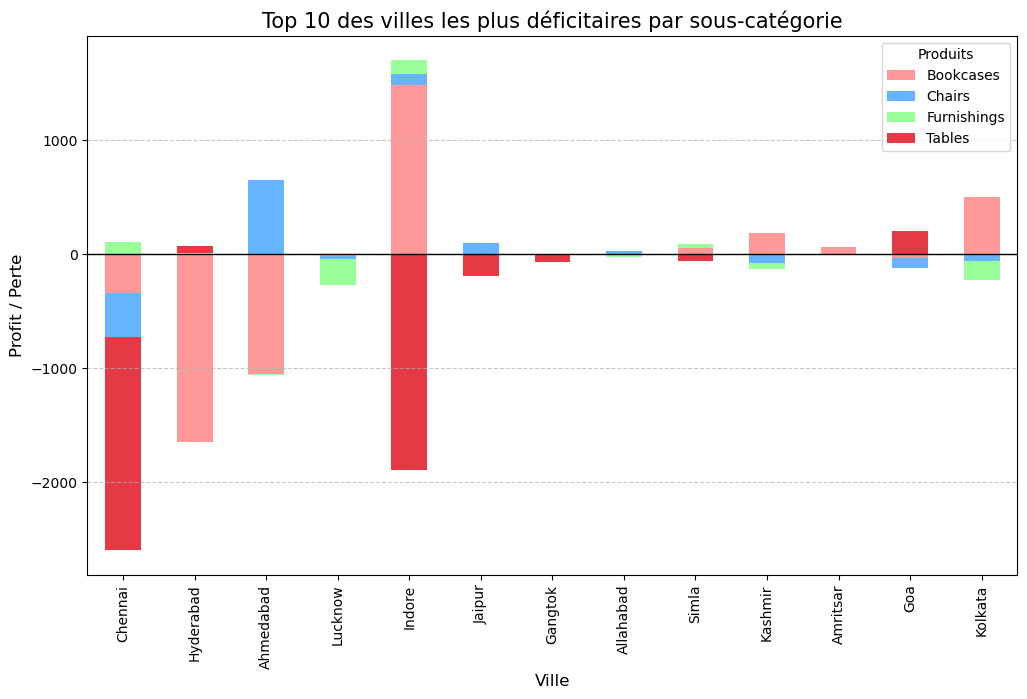

In [45]:
import matplotlib.pyplot as plt

#On récupere les 13 premieres valeurs car ce sont des pertes 
top_pertes = profit_comparatif.head(13)

#On retire la colonne 'Total' du graphique pour voir le niveau de pertes/gains de chaque produit
graph_data = top_pertes.drop(columns=['Total'])

# graphique en barres empilées
ax = graph_data.plot(kind='bar', 
                     figsize=(12, 7), 
                     stacked=True, 
                     color=['#ff9999','#66b3ff','#99ff99','#e63946']) 

# Style du graphique
plt.title('Top 10 des villes les plus déficitaires par sous-catégorie', fontsize=15)
plt.xlabel('Ville', fontsize=12)
plt.ylabel('Profit / Perte', fontsize=12)
plt.axhline(0, color='black', linewidth=1) # Ligne de démarcation à zéro
plt.legend(title="Produits")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [46]:
# Je vais maintenant comparer les valeurs réels aux valeurs de l'objectif prévisionnel 
objectif = pd.read_csv('Sales target.csv')
objectif.head(10)

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


In [47]:
import pandas as pd

# 1. Préparation de tes données de ventes (Réel)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Month_Year'] = df['Order Date'].dt.strftime('%b-%y')

# On calcule le total des ventes réelles par mois pour Furniture
reel_furniture = df[df['Category'] == 'Furniture'].groupby('Month_Year')['Amount'].sum().reset_index()
reel_furniture.columns = ['Month_Year', 'Ventes_Reelles']

# 2. Chargement et préparation des objectifs (Target)
targets = pd.read_csv('Sales target.csv')
# On ne garde que les objectifs pour Furniture
targets_furniture = targets[targets['Category'] == 'Furniture'].copy()
targets_furniture.columns = ['Month_Year', 'Category', 'Objectif_Target']

# 3. La Fusion (Merge) entre le Réel et l'Objectif
comparatif = pd.merge(reel_furniture, targets_furniture, on='Month_Year', how='left')

# 4. Calcul de l'écart (Performance)
# On calcule la différence entre ce qu'on a vendu et l'objectif
comparatif['Ecart'] = comparatif['Ventes_Reelles'] - comparatif['Objectif_Target']

# On calcule le % de réalisation
comparatif['%_Atteint'] = (comparatif['Ventes_Reelles'] / comparatif['Objectif_Target']) * 100

# 5. On nettoie et on affiche
comparatif = comparatif[['Month_Year', 'Ventes_Reelles', 'Objectif_Target', 'Ecart', '%_Atteint']]
print(comparatif)

   Month_Year  Ventes_Reelles  Objectif_Target   Ecart   %_Atteint
0      Apr-18          8121.0          10400.0 -2279.0   78.086538
1      Aug-18          9538.0          10900.0 -1362.0   87.504587
2      Dec-18          9474.0          11400.0 -1926.0   83.105263
3      Feb-19         16262.0          11600.0  4662.0  140.189655
4      Jan-19         21257.0          11500.0  9757.0  184.843478
5      Jul-18          3483.0          10800.0 -7317.0   32.250000
6      Jun-18          5532.0          10600.0 -5068.0   52.188679
7      Mar-19         16659.0          11800.0  4859.0  141.177966
8      May-18          6220.0          10500.0 -4280.0   59.238095
9      Nov-18         15165.0          11300.0  3865.0  134.203540
10     Oct-18          6766.0          11100.0 -4334.0   60.954955
11     Sep-18          8704.0          11000.0 -2296.0   79.127273


In [48]:
# 1. On transforme 'Month_Year' en format date réel pour le tri
# Pandas comprend que 'Apr-18' est une date s'il a un format précis
comparatif['Date_Sort'] = pd.to_datetime(comparatif['Month_Year'], format='%b-%y')

# 2. On trie le tableau par cette nouvelle colonne
comparatif = comparatif.sort_values('Date_Sort')

# 3. On supprime la colonne de tri pour garder un tableau propre
comparatif = comparatif.drop(columns=['Date_Sort'])

print(comparatif)

   Month_Year  Ventes_Reelles  Objectif_Target   Ecart   %_Atteint
0      Apr-18          8121.0          10400.0 -2279.0   78.086538
8      May-18          6220.0          10500.0 -4280.0   59.238095
6      Jun-18          5532.0          10600.0 -5068.0   52.188679
5      Jul-18          3483.0          10800.0 -7317.0   32.250000
1      Aug-18          9538.0          10900.0 -1362.0   87.504587
11     Sep-18          8704.0          11000.0 -2296.0   79.127273
10     Oct-18          6766.0          11100.0 -4334.0   60.954955
9      Nov-18         15165.0          11300.0  3865.0  134.203540
2      Dec-18          9474.0          11400.0 -1926.0   83.105263
4      Jan-19         21257.0          11500.0  9757.0  184.843478
3      Feb-19         16262.0          11600.0  4662.0  140.189655
7      Mar-19         16659.0          11800.0  4859.0  141.177966
